<a href="https://colab.research.google.com/github/epark21/DSBA6400/blob/master/ar_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/df1.csv')

In [ ]:
df1

,Unnamed: 0,tic,date,skc,skcc,ske,skec,skv,skvc,skm,skmc,sko,skoc,name,spr,ar,donation,donation_y,type,positiveincrease,deathincrease,Name,Sector,Title,Full letter,top leadership,Stakeholder audience,customer,employee,community,environment,general,Media,cash,in-kind
0,0,A,1/2/2020,61.840046,NaN,82.027855,NaN,57.154064,NaN,64.2895,NaN,48.86142,NaN,Agilent Technologies Inc,0.000000,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1,A,1/3/2020,61.840046,0.0,82.027855,0.0,57.154064,0.0,64.2895,0.0,48.86142,0.0,Agilent Technologies Inc,-0.007060,-0.008996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,2,A,1/4/2020,61.840046,0.0,82.027855,0.0,57.154064,0.0,64.2895,0.0,48.86142,0.0,Agilent Technologies Inc,0.000000,-0.006190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,3,A,1/5/2020,61.840046,0.0,82.027855,0.0,57.154064,0.0,64.2895,0.0,48.86142,0.0,Agilent Technologies Inc,0.000000,-0.003383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,4,A,1/6/2020,61.840046,0.0,82.027855,0.0,57.154064,0.0,64.2895,0.0,48.86142,0.0,Agilent Technologies Inc,0.003533,-0.000577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86698,86698,ZTS,6/26/2020,72.861470,0.0,66.022490,0.0,62.174095,0.0,NaN,NaN,62.14429,0.0,Zoetis Inc,-0.024227,0.004642,NaN,NaN,NaN,44421.0,636.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
86699,86699,ZTS,6/27/2020,72.861470,0.0,66.022490,0.0,62.174095,0.0,NaN,NaN,62.14429,0.0,Zoetis Inc,0.000000,-0.003509,NaN,NaN,NaN,43507.0,509.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
86700,86700,ZTS,6/28/2020,72.861470,0.0,66.022490,0.0,62.174095,0.0,NaN,NaN,62.14429,0.0,Zoetis Inc,0.000000,-0.011660,NaN,NaN,NaN,42183.0,271.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
86701,86701,ZTS,6/29/2020,72.861470,0.0,66.022490,0.0,62.174095,0.0,NaN,NaN,62.14429,0.0,Zoetis Inc,0.014686,-0.019812,NaN,NaN,NaN,36423.0,330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [ ]:
df1 = df1.drop(columns=['Unnamed: 0'])

In [ ]:
df1

,tic,date,skc,skcc,ske,skec,skv,skvc,skm,skmc,sko,skoc,name,spr,ar,donation,donation_y,type,positiveincrease,deathincrease,Name,Sector,Title,Full letter,top leadership,Stakeholder audience,customer,employee,community,environment,general,Media,cash,in-kind
0,A,1/2/2020,61.840046,NaN,82.027855,NaN,57.154064,NaN,64.2895,NaN,48.86142,NaN,Agilent Technologies Inc,0.000000,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,A,1/3/2020,61.840046,0.0,82.027855,0.0,57.154064,0.0,64.2895,0.0,48.86142,0.0,Agilent Technologies Inc,-0.007060,-0.008996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,A,1/4/2020,61.840046,0.0,82.027855,0.0,57.154064,0.0,64.2895,0.0,48.86142,0.0,Agilent Technologies Inc,0.000000,-0.006190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,A,1/5/2020,61.840046,0.0,82.027855,0.0,57.154064,0.0,64.2895,0.0,48.86142,0.0,Agilent Technologies Inc,0.000000,-0.003383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,A,1/6/2020,61.840046,0.0,82.027855,0.0,57.154064,0.0,64.2895,0.0,48.86142,0.0,Agilent Technologies Inc,0.003533,-0.000577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86698,ZTS,6/26/2020,72.861470,0.0,66.022490,0.0,62.174095,0.0,NaN,NaN,62.14429,0.0,Zoetis Inc,-0.024227,0.004642,NaN,NaN,NaN,44421.0,636.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
86699,ZTS,6/27/2020,72.861470,0.0,66.022490,0.0,62.174095,0.0,NaN,NaN,62.14429,0.0,Zoetis Inc,0.000000,-0.003509,NaN,NaN,NaN,43507.0,509.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
86700,ZTS,6/28/2020,72.861470,0.0,66.022490,0.0,62.174095,0.0,NaN,NaN,62.14429,0.0,Zoetis Inc,0.000000,-0.011660,NaN,NaN,NaN,42183.0,271.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
86701,ZTS,6/29/2020,72.861470,0.0,66.022490,0.0,62.174095,0.0,NaN,NaN,62.14429,0.0,Zoetis Inc,0.014686,-0.019812,NaN,NaN,NaN,36423.0,330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [ ]:
df1 = df1.replace([np.inf, -np.inf], np.nan)

In [ ]:
df1.fillna(0, inplace=True)

In [ ]:
df1

,tic,date,skc,skcc,ske,skec,skv,skvc,skm,skmc,sko,skoc,name,spr,ar,donation,donation_y,type,positiveincrease,deathincrease,Name,Sector,Title,Full letter,top leadership,Stakeholder audience,customer,employee,community,environment,general,Media,cash,in-kind
0,A,1/2/2020,61.840046,0.0,82.027855,0.0,57.154064,0.0,64.2895,0.0,48.86142,0.0,Agilent Technologies Inc,0.000000,0.000000,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,A,1/3/2020,61.840046,0.0,82.027855,0.0,57.154064,0.0,64.2895,0.0,48.86142,0.0,Agilent Technologies Inc,-0.007060,-0.008996,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,A,1/4/2020,61.840046,0.0,82.027855,0.0,57.154064,0.0,64.2895,0.0,48.86142,0.0,Agilent Technologies Inc,0.000000,-0.006190,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,A,1/5/2020,61.840046,0.0,82.027855,0.0,57.154064,0.0,64.2895,0.0,48.86142,0.0,Agilent Technologies Inc,0.000000,-0.003383,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,A,1/6/2020,61.840046,0.0,82.027855,0.0,57.154064,0.0,64.2895,0.0,48.86142,0.0,Agilent Technologies Inc,0.003533,-0.000577,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86698,ZTS,6/26/2020,72.861470,0.0,66.022490,0.0,62.174095,0.0,0.0000,0.0,62.14429,0.0,Zoetis Inc,-0.024227,0.004642,0,0.0,0,44421.0,636.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
86699,ZTS,6/27/2020,72.861470,0.0,66.022490,0.0,62.174095,0.0,0.0000,0.0,62.14429,0.0,Zoetis Inc,0.000000,-0.003509,0,0.0,0,43507.0,509.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
86700,ZTS,6/28/2020,72.861470,0.0,66.022490,0.0,62.174095,0.0,0.0000,0.0,62.14429,0.0,Zoetis Inc,0.000000,-0.011660,0,0.0,0,42183.0,271.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
86701,ZTS,6/29/2020,72.861470,0.0,66.022490,0.0,62.174095,0.0,0.0000,0.0,62.14429,0.0,Zoetis Inc,0.014686,-0.019812,0,0.0,0,36423.0,330.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x = np.array(df1['donation_y']).reshape((-1, 1))
y = np.array(df1['ar'])

In [ ]:
from sklearn.preprocessing import MaxAbsScaler 
scaler = MaxAbsScaler()
x=scaler.fit_transform(x)

In [ ]:
X_train = x[:-20]
X_test = x[-20:]

In [ ]:
y_train = y[:-20]
y_test = y[-20:]

Coefficients: 
 [0.00068895]
Mean squared error: 0.00
Coefficient of determination: -0.01


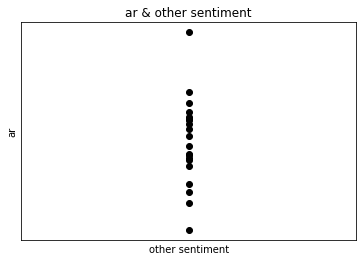

In [ ]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

# Add title and axis names
plt.title('ar & other sentiment')
plt.xlabel('other sentiment')
plt.ylabel('ar')



plt.show()

